# Watershed Project - Mapping Floodplain Connectivity in Boulder County
![Watershed Project](https://watershed.center/wp-content/uploads/2023/04/adaptive-restoration-square.jpg)

* Add code to download 2 datesets and process to make a plot
* Possibly link to DTM on google and use RiverREM to plot or just upload DTM and they process (but file size may be to large)
* Create an environement that inlcudes river REM project

In [1]:
# set local paths
dtm = r'C:\Users\Julia\Documents\CU_Earth Data Analytics\Spring Project\DEM_DTM_ortho\DTM_Highway93.tif'
centerline_shp = r'C:\Users\Julia\Documents\CU_Earth Data Analytics\Spring Project\RiverREM\streamline_js_highway93.shp'
out_dir = r'C:\Users\Julia\Documents\CU_Earth Data Analytics\Spring Project\RiverREM\test2'

In [6]:
# import packages
# make sure you have RiverREM imported, check readme for instructions
import os
import pathlib
import zipfile

import earthpy as et
import earthpy.plot as ep
import requests
from riverrem.REMMaker import REMMaker
import rasterio as rio

In [7]:
# Set working directory
working_dir = os.path.join(
    pathlib.Path.home(), 'earth-analytics', 'data', 'watershed-project')
if not os.path.exists(working_dir):
    print('{} does not exist. Creating...'.format(working_dir))
    os.makedirs(working_dir)
    
os.chdir(working_dir)

In [9]:
# Load streamline shapefile from repo
centerline_shp_git = "streamline.shp"

# Download and cache DTM 
override_cache = False
# Load dtm from gdrive?
hwy_93_url = ("https://drive.google.com/file"
              "/d/1QBTtv5_t7VOMaB_YLJNgc4bZEqjNluon/view?usp=share_link")

dtm_dir = os.path.join('uav_hwy93')
dtm_path = os.path.join(dtm_dir, 'DTM_Highway93.tif')

# Cache DTM file
if not os.path.exists(dtm_dir):
    os.makedirs(dtm_dir)
    
    if (not os.path.exists(dtm_path)) or override_cache:
        # Download full DTM as zipfile 
        response = requests.get(hwy_93_url)

        # Write in respose content using context manager
        with open(dtm_path, 'wb') as dtm_file:
            dtm_file.write(response.content)
       
        # Set  downloaded dtm file as variable for riverrem
        river_dtm = dtm_file
        
# rem_maker = REMMaker(dem=river_dtm, centerline_shp = centerline_shp_got, out_dir=dtm_dir, interp_pts=2000)

In [40]:
# provide the DEM file path and desired output directory
rem_maker = REMMaker(dem=dtm, centerline_shp = centerline_shp, out_dir=out_dir, interp_pts=2000)
# create an REM
rem_maker.make_rem()
# create an REM visualization with the given colormap
rem_maker.make_rem_viz(cmap='mako_r')


[INFO] 2023-04-29 21:14:09,715 - Getting DEM projection.
[INFO] 2023-04-29 21:14:09,761 - Reading DEM as array.
[INFO] 2023-04-29 21:14:16,647 - Getting DEM bounds.
[INFO] 2023-04-29 21:14:16,691 - Mapping array indices to coordinates.
[INFO] 2023-04-29 21:14:16,758 - Using input centerline shapefile.
C:\Users\Julia\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\tools\clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
C:\Users\Julia\miniconda3\envs\earth-analytics-python\lib\site-packages\riverrem\REMMaker.py:322: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  self.river_length = self.rivers.l


Making multidirectional hillshade raster.
Tiling and compressing raster.
Saved ./.cache\DEM_Highway93_hillshade.tif.

Making color relief map with cmap=mako_r.
Tiling and compressing raster.
Saved ./.cache\DEM_Highway93_REM_color-relief.tif.

Generating .png file.
Saved ./.cache\DEM_Highway93_REM_color-relief.png.

Making hillshade-color composite raster.
Tiling and compressing raster.
Saved C:\Users\Julia\Documents\CU_Earth Data Analytics\Spring Project\RiverREM\test2\DEM_Highway93_hillshade-color.tif.

Generating .png file.
Saved C:\Users\Julia\Documents\CU_Earth Data Analytics\Spring Project\RiverREM\test2\DEM_Highway93_hillshade-color.png.


'C:\\Users\\Julia\\Documents\\CU_Earth Data Analytics\\Spring Project\\RiverREM\\test2\\DEM_Highway93_hillshade-color.tif'

In [28]:
# Output path
rem_path = r'C:\Users\Julia\Documents\CU_Earth Data Analytics\Spring Project\RiverREM\test2\DEM_Highway93_REM.tif'


(<Figure size 1000x600 with 1 Axes>, <AxesSubplot: >)

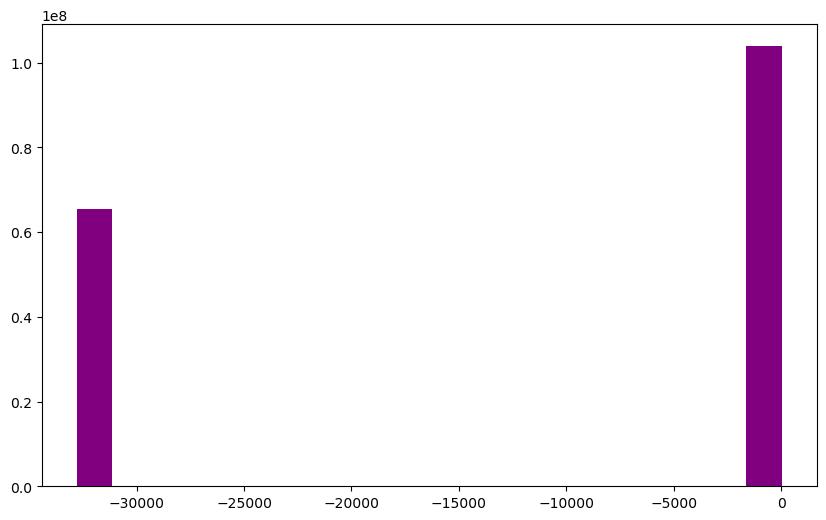

In [50]:
# Open rem raster
with rio.open(rem_path) as rem_src:
    rem_pre_arr = rem_src.read(1)
    

# Plot
# ep.plot_bands(rem_pre_arr,
#               title="title",
#               cmap="Greys")

ep.hist(rem_pre_arr, figsize=(10, 6))

